In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler


from DataProduction import dataProd

import warnings
warnings.filterwarnings('ignore')

# Initialize scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Data production and loading
run_list = [285490, 286498, 287987, 288543, 289413, 289733, 291970, 293528]
planes_list = ['UTaX', 'UTaU', 'UTbV', 'UTbX']

dataProduction = dataProd()
mix_ = dataProduction.multipleRun(*run_list)
mix = mix_.copy()

import random
random.seed(46)

# from scipy.special import kl_div,softmax
sns.set(
    context='notebook',  # 'paper', 'notebook', 'talk', 'poster'
    style='darkgrid',   # 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'
    palette='deep',      # Color palette
    font='sans-serif',   # Font family
    font_scale=0.75,      # Font scale
    rc={'figure.figsize': (12, 6)}  # Default figure size
)

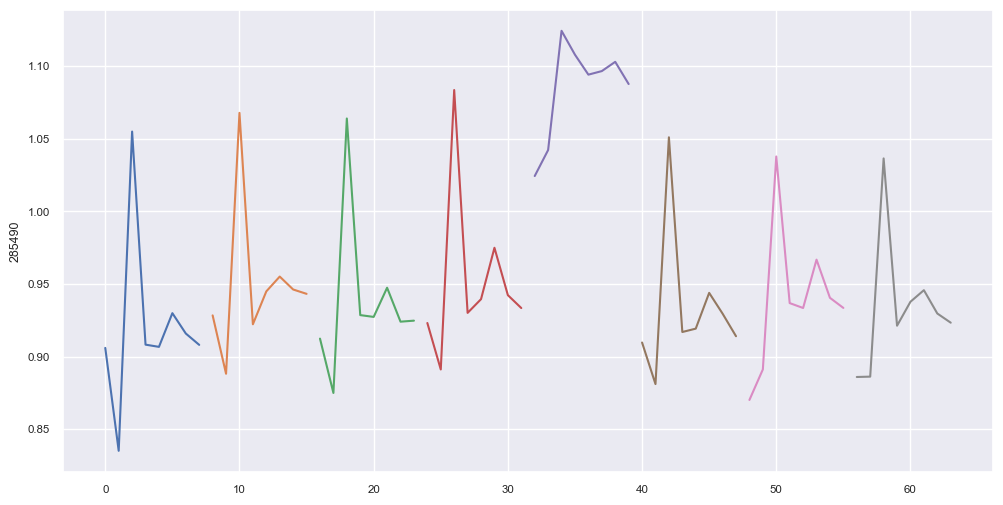

In [2]:
chip_sigma = mix.xs('ChipSigma', level=1, axis=1)
# chip_mean = mix.xs('ChipSigma', level=1, axis=1)
plane = mix.xs('Plane',level=1,axis=1)[285490]
position = mix.xs('Position',level=1,axis=1)[285490]

sigma = pd.concat([chip_sigma,position,plane],axis=1)

sigma.columns = [285490, 286498, 287987, 288543, 289413, 289733, 291970, 293528, 'Position','Plane']

utax = sigma[sigma['Plane']=='UTaX'].drop('Plane',axis=1)

mean_utax = utax.groupby('Position').agg('mean')

for i, idx in enumerate(run_list):
    # Calculate the x-range for each plot
    start = i * mean_utax.shape[0]
    end = (i + 1) * mean_utax.shape[0]
    sns.lineplot(x=np.arange(start, end), y=mean_utax[idx])


<Axes: xlabel='Position'>

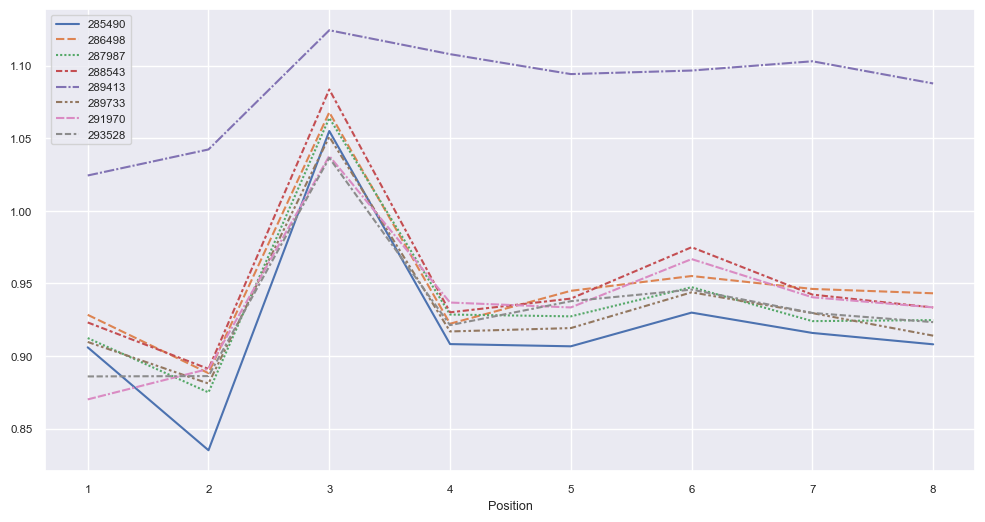

In [5]:
sns.lineplot(mean_utax)